In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
ames = pd.read_csv("/content/AmesHousing (2).csv")
ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


13.2.5 Practice Activity

Consider four possible models for predicting house prices:
1. Using only the size and number of rooms
2. Using size, number of rooms, and building type
3. Using size and building type, and their interaction
4. Using a 5-degree polynomial on size, a 5-degree polynomial on number of rooms, and also building type

Set up a pipeline for each of these four models

Then, get predictions on the test set for each of your pipelines, and compute the root mean square error. Which model performed best?

In [ ]:
from sklearn.pipeline import make_pipeline

lr_pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

lr_pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
lr_pipeline = Pipeline(
    [("standardize", StandardScaler()),
     ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('standardize', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [ ]:
X = ames[["Gr Liv Area", "TotRms AbvGrd"]]
y = ames["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X,y)
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)

y_preds = lr_pipeline_fitted.predict(X_test)
r2_score(y_test, y_preds)

0.5428233151716674

In [ ]:
new_house = pd.DataFrame(data = {"Gr Liv Area": [889], "TotRms AbvGrd": [6]})

In [ ]:
lr_pipeline_fitted.predict(new_house)

array([101677.17376321])

In [ ]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output = False), ["Bldg Type"]),
        ("standardize", StandardScaler(), ["Gr Liv Area", "TotRms AbvGrd"])
    ],
    remainder = "drop"
)
ct

ColumnTransformer(transformers=[('dummify', OneHotEncoder(sparse_output=False),
                                 ['Bldg Type']),
                                ('standardize', StandardScaler(),
                                 ['Gr Liv Area', 'TotRms AbvGrd'])])

In [ ]:
lr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("linear_regression", LinearRegression())]
)
lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Bldg Type']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['Gr Liv Area',
                                                   'TotRms AbvGrd'])])),
                ('linear_regression', LinearRegression())])

In [ ]:
X = ames.drop("SalePrice", axis=1)
y = ames["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X,y)
lr_fitted = lr_pipeline.fit(X_train, y_train)

In [ ]:
ct_fitted = ct.fit(X_train)
ct.transform(X_train)

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.79852209, -0.28793428],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.70901319, -0.28793428],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.8588433 , -1.57108159],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.09656691, -0.92950793],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.35876097, -0.28793428],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.87701567,  1.63678667]])

In [ ]:
ct.transform(X_test)

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.20553426,  0.35363937],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.35731022,  0.99521302],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.09267522, -0.28793428],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.33006838,  2.27836032],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.59226245, -0.92950793],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.41324465, -0.28793428]])

In [ ]:
lr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("linear_regression", LinearRegression())]
).set_output(transform='pandas')

ct.fit_transform(X_train)

,dummify__Bldg Type_1Fam,dummify__Bldg Type_2fmCon,dummify__Bldg Type_Duplex,dummify__Bldg Type_Twnhs,dummify__Bldg Type_TwnhsE,standardize__Gr Liv Area,standardize__TotRms AbvGrd
1234,1.0,0.0,0.0,0.0,0.0,-0.798522,-0.287934
2573,1.0,0.0,0.0,0.0,0.0,-0.709013,-0.287934
231,1.0,0.0,0.0,0.0,0.0,-0.858843,-1.571082
2902,1.0,0.0,0.0,0.0,0.0,0.641404,1.636787
342,1.0,0.0,0.0,0.0,0.0,-0.144718,0.353639
...,...,...,...,...,...,...,...
1745,1.0,0.0,0.0,0.0,0.0,0.042083,0.353639
1594,0.0,0.0,0.0,0.0,1.0,-0.397678,-1.571082
1449,1.0,0.0,0.0,0.0,0.0,0.096567,-0.929508
204,1.0,0.0,0.0,0.0,0.0,-0.358761,-0.287934


In [ ]:
lr_pipeline_fitted.named_steps['linear_regression'].coef_

array([ 71352.24251832, -16725.11796159])

In [ ]:
ct_inter = ColumnTransformer(
    [
        ("interaction", PolynomialFeatures(interaction_only = True), ["Gr Liv Area", "TotRms AbvGrd"])
    ],
    remainder = "drop"
).set_output(transform = "pandas")
ct_inter.fit_transform(X_train)

,interaction__1,interaction__Gr Liv Area,interaction__TotRms AbvGrd,interaction__Gr Liv Area TotRms AbvGrd
1234,1.0,1098.0,6.0,6588.0
2573,1.0,1144.0,6.0,6864.0
231,1.0,1067.0,4.0,4268.0
2902,1.0,1838.0,9.0,16542.0
342,1.0,1434.0,7.0,10038.0
...,...,...,...,...
1745,1.0,1530.0,7.0,10710.0
1594,1.0,1304.0,4.0,5216.0
1449,1.0,1558.0,5.0,7790.0
204,1.0,1324.0,6.0,7944.0


In [ ]:
ct_dummies = ColumnTransformer(
  [("dummify", OneHotEncoder(sparse_output = False), ["Bldg Type"])],
  remainder = "passthrough"
).set_output(transform = "pandas")

ct_inter = ColumnTransformer(
  [
    ("interaction", PolynomialFeatures(interaction_only = True), ["remainder__TotRms AbvGrd", "dummify__Bldg Type_1Fam"]),
  ],
  remainder = "drop"
).set_output(transform = "pandas")

X_train_dummified = ct_dummies.fit_transform(X_train)
X_train_dummified

,dummify__Bldg Type_1Fam,dummify__Bldg Type_2fmCon,dummify__Bldg Type_Duplex,dummify__Bldg Type_Twnhs,dummify__Bldg Type_TwnhsE,remainder__Order,remainder__PID,remainder__MS SubClass,remainder__MS Zoning,remainder__Lot Frontage,...,remainder__Screen Porch,remainder__Pool Area,remainder__Pool QC,remainder__Fence,remainder__Misc Feature,remainder__Misc Val,remainder__Mo Sold,remainder__Yr Sold,remainder__Sale Type,remainder__Sale Condition
1234,1.0,0.0,0.0,0.0,0.0,1235,535150210,20,RL,NaN,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
2573,1.0,0.0,0.0,0.0,0.0,2574,535152070,80,RL,70.0,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
231,1.0,0.0,0.0,0.0,0.0,232,905202090,20,RL,60.0,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
2902,1.0,0.0,0.0,0.0,0.0,2903,921205050,20,RL,88.0,...,0,0,NaN,NaN,NaN,0,9,2006,New,Partial
342,1.0,0.0,0.0,0.0,0.0,343,526351100,20,RL,85.0,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1.0,0.0,0.0,0.0,0.0,1746,528231010,20,RL,182.0,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Family
1594,0.0,0.0,0.0,0.0,1.0,1595,923225150,160,RM,NaN,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
1449,1.0,0.0,0.0,0.0,0.0,1450,907202240,20,RL,40.0,...,227,0,NaN,NaN,NaN,0,8,2008,WD,Normal
204,1.0,0.0,0.0,0.0,0.0,205,903430080,70,RM,52.0,...,0,0,NaN,GdPrv,NaN,0,2,2010,WD,Normal


In [ ]:
ct_inter.fit_transform(X_train_dummified)

,interaction__1,interaction__remainder__TotRms AbvGrd,interaction__dummify__Bldg Type_1Fam,interaction__remainder__TotRms AbvGrd dummify__Bldg Type_1Fam
1234,1.0,6.0,1.0,6.0
2573,1.0,6.0,1.0,6.0
231,1.0,4.0,1.0,4.0
2902,1.0,9.0,1.0,9.0
342,1.0,7.0,1.0,7.0
...,...,...,...,...
1745,1.0,7.0,1.0,7.0
1594,1.0,4.0,0.0,0.0
1449,1.0,5.0,1.0,5.0
204,1.0,6.0,1.0,6.0


In [ ]:
from sklearn.model_selection import train_test_split
X = ames[["Gr Liv Area", "TotRms AbvGrd"]]
y = ames["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
lr_pipeline = Pipeline(
    [("standardize", StandardScaler()),
     ("linear_regression", LinearRegression())]
)
lr_pipeline

Pipeline(steps=[('standardize', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [ ]:
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)

In [ ]:
lr_pipeline_fitted.named_steps['linear_regression'].coef_, lr_pipeline_fitted.named_steps['linear_regression'].intercept_

(array([ 73091.86857729, -19261.22092758]), np.float64(181508.6313993174))

In [ ]:
y_test_ = lr_pipeline.predict(X_test)

In [ ]:
y_test_

array([256787.45034099, 283566.29015859, 177212.06018423, ...,
       255532.96803784, 131586.61069219, 116627.251959  ])

In [ ]:
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(y_test, y_test_)
mse1

2947404069.647778

In [ ]:
lr_pipeline_fitted_2 = lr_pipeline.fit(X_test, y_test)

In [ ]:
lr_pipeline_fitted_2.named_steps['linear_regression'].coef_, lr_pipeline_fitted_2.named_steps['linear_regression'].intercept_

(array([ 67811.7845638 , -15403.07448499]), np.float64(180083.48873720138))

In [ ]:
y_train_ = lr_pipeline.predict(X_train)

In [ ]:
mse2 = mean_squared_error(y_train, y_train_)
mse2

3243220392.9804955

In [ ]:
mse = (mse1 + mse2) / 2
mse

3095312231.3141365

In [ ]:
np.sqrt(mse)

np.float64(55635.53029597306)

In [ ]:
X = ames[["Gr Liv Area", "TotRms AbvGrd"]]
y = ames["SalePrice"]

In [ ]:
lr_pipeline = Pipeline(
    [("standardize", StandardScaler()),
     ("linear_regression", LinearRegression())]
)
lr_pipeline

Pipeline(steps=[('standardize', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_pipeline,
                         X=X,
                         y=y,
                         scoring="neg_mean_squared_error",
                         cv=2)
scores

array([-3.05435445e+09, -3.18282295e+09])

In [ ]:
-scores.mean()
np.sqrt(-scores.mean())

np.float64(55844.325559447454)

In [ ]:
scores = cross_val_score(lr_pipeline,
                         X=X,
                         y=y,
                         scoring="neg_mean_squared_error",
                         cv=4)
scores

array([-3.40933309e+09, -2.69745168e+09, -3.82979321e+09, -2.62423005e+09])

In [ ]:
np.sqrt(-scores.mean())


np.float64(56037.50535324145)

In [ ]:
ct = ColumnTransformer(
    [
    ("standardize", StandardScaler(), ["Gr Liv Area", "TotRms AbvGrd"]),
    ("dummify", OneHotEncoder(), ["Neighborhood"])
    ],
    remainder="drop"  # all other columns in X will be dropped.
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['Gr Liv Area',
                                                   'TotRms AbvGrd']),
                                                 ('dummify', OneHotEncoder(),
                                                  ['Neighborhood'])])),
                ('linear_regression', LinearRegression())])

In [ ]:
X = ames
y = ames["SalePrice"]

scores = cross_val_score(lr_pipeline,
                         X=X,
                         y=y,
                         scoring="neg_mean_squared_error",
                         cv=5)
scores

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", l

array([-2.00906181e+09, -1.46862787e+09, -1.77515493e+09, -1.82027662e+09,
                   nan])

In [ ]:
ct = ColumnTransformer(
    [
    ("standardize", StandardScaler(), ["Gr Liv Area", "TotRms AbvGrd"]),
    ("dummify", OneHotEncoder(handle_unknown="ignore"), ["Neighborhood"])
    ],
    remainder="drop"  # all other columns in X will be dropped.
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['Gr Liv Area',
                                                   'TotRms AbvGrd']),
                                                 ('dummify',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood'])])),
                ('linear_regression', LinearRegression())])

In [ ]:
X = ames
y = ames["SalePrice"]

scores = cross_val_score(lr_pipeline,
                         X = X,
                         y=y,
                         scoring = "neg_mean_squared_error",
                         cv=5)

In [ ]:
from sklearn.model_selection import GridSearchCV
ct_poly = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output = False), ["Bldg Type"]),
        ("polynomial", PolynomialFeatures(), ["Gr Liv Area"])
    ],
    remainder = "drop"
)
lr_pipeline_poly = Pipeline(
    [("preprocessing", ct_poly),
     ("linear_regression", LinearRegression())]
).set_output(transform='pandas')

degrees = {'preprocessing__polynomial__degree': np.arange(1, 10)}
gscv = GridSearchCV(lr_pipeline_poly, param_grid=degrees, cv=5, scoring='r2')

In [ ]:
gscv_fitted = gscv.fit(X, y)
gscv_fitted.cv_results_

{'mean_fit_time': array([0.01072817, 0.01232963, 0.01061788, 0.01016064, 0.01034403,
        0.01077547, 0.01099625, 0.01061106, 0.01060305]),
 'std_fit_time': array([0.00099381, 0.00424678, 0.00067071, 0.00022381, 0.0005255 ,
        0.00094924, 0.00041358, 0.00014594, 0.0001325 ]),
 'mean_score_time': array([0.005794  , 0.00682559, 0.00584741, 0.00569367, 0.00575905,
        0.00606084, 0.00605025, 0.00594449, 0.00589852]),
 'std_score_time': array([1.88331869e-04, 1.14663048e-03, 2.51686171e-04, 1.07409938e-04,
        2.90459882e-04, 7.06588413e-04, 1.74019472e-04, 1.41766101e-04,
        8.80185598e-05]),
 'param_preprocessing__polynomial__degree': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=999999),
 'params': [{'preprocessing__polynomial__degree': np.int64(1)},
  {'preprocessing__polynomial__degree': np.int64(2)},
  {'preprocessing__polynomial__degree': n

In [ ]:
gscv_fitted.cv_results_['mean_test_score']

array([ 0.52988868,  0.5314061 ,  0.55123644,  0.49921823,  0.49713958,
        0.44472675,  0.26412025, -0.26944803, -1.83251917])

In [ ]:
pd.DataFrame(data = {"degrees": np.arange(1,10), "scores": gscv_fitted.cv_results_['mean_test_score']})

,degrees,scores
0,1,0.529889
1,2,0.531406
2,3,0.551236
3,4,0.499218
4,5,0.497140
5,6,0.444727
6,7,0.264120
7,8,-0.269448
8,9,-1.832519


In [ ]:
df_cv_results_ = pd.DataFrame(gscv_fitted.cv_results_)
df_cv_results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__polynomial__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010728,0.000994,0.005794,0.000188,1,{'preprocessing__polynomial__degree': 1},0.536672,0.523799,0.432059,0.562666,0.594247,0.529889,0.054535,3
1,0.012330,0.004247,0.006826,0.001147,2,{'preprocessing__polynomial__degree': 2},0.538618,0.517399,0.449991,0.575742,0.575281,0.531406,0.046405,2
2,0.010618,0.000671,0.005847,0.000252,3,{'preprocessing__polynomial__degree': 3},0.551554,0.524895,0.505386,0.586537,0.587810,0.551236,0.032802,1
3,0.010161,0.000224,0.005694,0.000107,4,{'preprocessing__polynomial__degree': 4},0.509180,0.454661,0.408593,0.547427,0.576230,0.499218,0.060914,4
4,0.010344,0.000526,0.005759,0.000290,5,{'preprocessing__polynomial__degree': 5},0.507440,0.445234,0.458415,0.509277,0.565332,0.497140,0.042656,5
5,0.010775,0.000949,0.006061,0.000707,6,{'preprocessing__polynomial__degree': 6},0.488717,0.422596,0.405085,0.357427,0.549810,0.444727,0.067320,6
6,0.010996,0.000414,0.006050,0.000174,7,{'preprocessing__polynomial__degree': 7},0.446858,0.382049,0.185255,-0.206586,0.513025,0.264120,0.259630,7
7,0.010611,0.000146,0.005944,0.000142,8,{'preprocessing__polynomial__degree': 8},0.387189,0.330723,-0.523899,-1.994890,0.453637,-0.269448,0.933394,8
8,0.010603,0.000133,0.005899,0.000088,9,{'preprocessing__polynomial__degree': 9},0.317553,0.273531,-2.874989,-7.261625,0.382935,-1.832519,2.984240,9


In [ ]:
df_cv_results_["param_preprocessing__polynomial__degree"] = df_cv_results_["param_preprocessing__polynomial__degree"].astype(int)
df_cv_results_.set_index("param_preprocessing__polynomial__degree", inplace = True)

<Axes: title={'center': 'kNN models with 4 features'}, xlabel='k', ylabel='test error'>

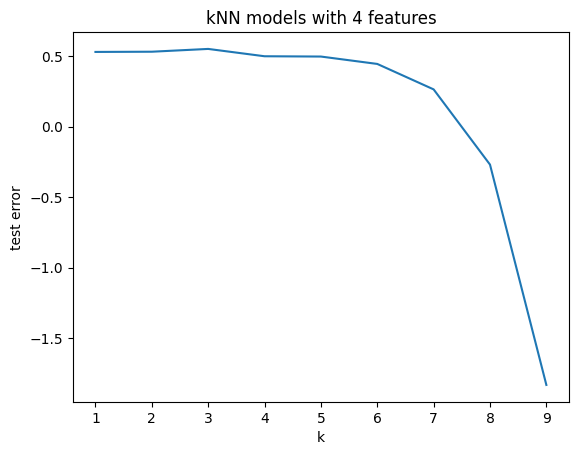

In [ ]:
(df_cv_results_["mean_test_score"]).plot.line(xlabel = "k", ylabel = "test error", title = "kNN models with 4 features")